# Fake News Classifier using Bag of words

In [102]:
#importing libraries
import numpy as np
import pandas as pd

In [103]:
#reading the dataset
df = pd.read_csv('train.csv')

In [104]:
#checking all data is correct or not
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [105]:
#Get the independent feature
X = df.drop('label',axis=1)

In [106]:
#printinf the X
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [107]:
#Get the dependent feature
y = df['label']

In [108]:
#printing the y
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [109]:
#checking the shape of the dataset
df.shape

(20800, 5)

In [110]:
#importing the libraries to create bag of words 
from sklearn.feature_extraction.text import CountVectorizer

In [111]:
#checking null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [112]:
#droping all the null values
df = df.dropna()

#shaping y
y = df['label']

In [113]:
#checking the shape of the dataset
df.shape

(18285, 5)

In [114]:
#for security of data
message = df.copy()

In [115]:
#After dropping some values, we have empty index an to fill
message.reset_index(inplace=True)

In [116]:
#cleaning the text (lowering)
import re

#PorterStemmer is used to get the word stem
from nltk.stem.porter import PorterStemmer

#stopwords helps us to remove the words like 'for', 'then', 'from', 'and' which are repeting again and again
#which does not put much value to identify sentance
from nltk.corpus import stopwords

In [117]:
#creating objects for PorterStemmer
stemmer = PorterStemmer()

#After cleaning the text we are going to store final result to corpus
corpus = []

In [118]:
#words are not clear hence we do lemmatization.

#Cleaning text lemmatization
for i in range(len(message)):
    
    #replacing all other information like '. ,'  with space
    review = re.sub('[^a-zA-Z]',' ', message['title'][i])      
    
    #lowering the sentances
    review = review.lower()
    
    #spliting the sentance to get the words
    review = review.split()
    
    #list comprehension (stemming)
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    #joining all the list of words to review
    review = ' '.join(review)
    
    #appending all the words to corpus
    corpus.append(review)

In [119]:
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

#creating object and take most occuring 5000 words
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

#creating matrix
X = cv.fit_transform(corpus).toarray()

In [120]:
#X has 5000 different features of 18000 words
X.shape

(18285, 5000)

In [121]:
y.shape

(18285,)

In [122]:
#Divide the model to test the data
from sklearn.model_selection import train_test_split

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [123]:
#featuress names on which we can classify
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [125]:
# getting parameters
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [126]:
#Bag of words matrix
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())

In [128]:
#printing the matrix
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [130]:
#importing the matplot lib
import matplotlib.pyplot as plt

In [131]:
    #Ploting confusion matrix
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        See full source and example: 
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [132]:
#Multinormial Naive Baise as classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [134]:
#importing libraries
from sklearn import metrics
import itertools

Accuracy : - 0.902
Confusion matrix, without normalization


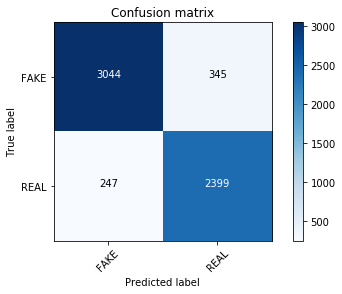

In [138]:
#building the confusion matrix
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy : - %0.3f" % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [140]:
#Passive aggressive classifier algo
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)

accuracy:   0.917
Confusion matrix, without normalization


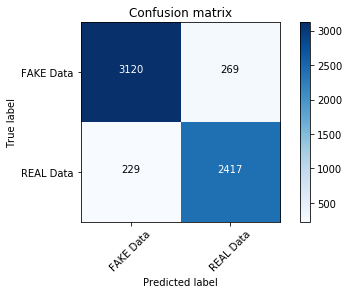

In [141]:
#builing model and confusion matrix
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [142]:
#Naive baise classifier with hyperparameter
classifier=MultinomialNB(alpha=0.1)

In [148]:
#building model with alpha value
previous_score=0
for alpha in np.arange(0,1,0.1):
    
    #creating sub - classfier
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    
    #if previous score is less than score then replace the classifier as sub classifier to get best output
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}\t\t, Score : {}\t".format(alpha,score))

F:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0		, Score : 0.8903065451532726	
Alpha: 0.1		, Score : 0.9020712510356255	
Alpha: 0.2		, Score : 0.9025683512841757	
Alpha: 0.30000000000000004		, Score : 0.9024026512013256	
Alpha: 0.4		, Score : 0.9017398508699255	
Alpha: 0.5		, Score : 0.9015741507870754	
Alpha: 0.6000000000000001		, Score : 0.9022369511184756	
Alpha: 0.7000000000000001		, Score : 0.9025683512841757	
Alpha: 0.8		, Score : 0.9015741507870754	
Alpha: 0.9		, Score : 0.9017398508699255	


In [149]:
#Get feature name to identify which word is fake or real
feature_name = cv.get_feature_names()

In [150]:
#coefficient values
classifier.coef_[0]

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [155]:
#most negative value is the most fakest value

#most real
sorted(zip(classifier.coef_[0],feature_name),reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [156]:
#most fakest
sorted(zip(classifier.coef_[0],feature_name))[:20]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new')]